# Short explanation of a t test
- t test tests the likelihood of obtaining a value of t from a normal population
- t is a weighted mean in a sense. More specifically, t is the difference between two means divided by (weighted by) a standard deviation.
- There is more than 1 way to perform a t test. We will start with a single sample t test and move on to other types of t tests later.

# "Single sample" t test
- One, it should be noted that researchers working at Guinness Brewer are often credited with creating the t test while studying barley...
- $t = \frac{\bar{X}-\mu}{\bar{\sigma}}\sqrt{n}$ where
    - $\bar{X}$ is the sample mean
    - $\mu$ is a hypothesized mean
    - n is the # of measurements collected 
    - $\bar{\sigma}$ is the sample standard deviation
- And it is assumed that all data measured comes from a normal distribution.

# Problem 1: Estimate p value using a brute-force sampled distributions of t.

*This is identifcally what we did in class.*

Step 1: Generate a normally distributed population.

Let's start by ensuring we understand how to sample normally distributed data. Using random.norm from numpy, randomly sample 10,000 values from a normal distribution whose mean is 12 and standard deviation is 2. Save the values in a variable called norm_data. Plot a histogram of the collected values and then plot a density plot of the collected values. 

Text(0, 0.5, 'Cumulative Probability Density')

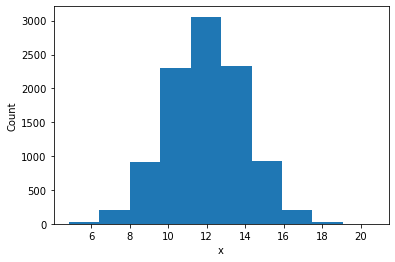

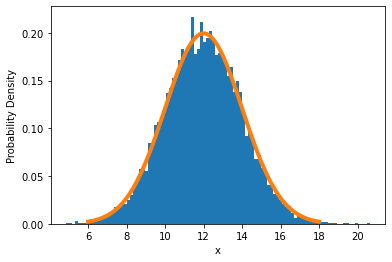

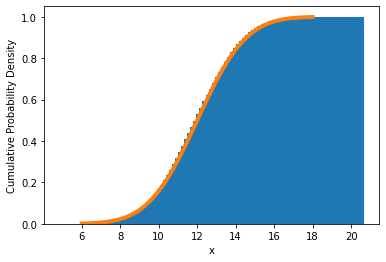

In [59]:
#numpy for random, matplotlib.pyplot for plotting, scipy for norm.pdf
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#population parameters, to distinguish from sample parameters
popmean = 12
popstdev = 2
pop = 10000
norm_data = np.random.normal(popmean, popstdev, pop)

#plotting a histogram
plt.subplots()
plt.hist(norm_data)
plt.xlabel("x")
plt.ylabel("Count")

#plotting probability density
plt.subplots()
plt.hist(norm_data, density = True,bins = 100)
x = np.linspace(popmean - 3*popstdev, popmean + 3*popstdev, 100)
plt.plot(x, stats.norm.pdf(x, popmean, popstdev), linewidth = 4)
plt.xlabel("x")
plt.ylabel("Probability Density")

#plotting cumulative probability density, the Cool One
plt.subplots()
plt.hist(norm_data, 100, density=True, cumulative=True)
plt.plot(x, stats.norm.cdf(x, popmean, popstdev), linewidth = 4)
plt.xlabel("x")
plt.ylabel("Cumulative Probability Density")


Step 2: Use your normally distributed population to generate a "null distribution" of t values for **when n = 3.**

The idea of a null hypothesis can be tricky without some practice. To generate a null hypothesis for any statistic requires choosing representative values, in this case for the population mean $\mu$. Ultimatelty, we are asking "if I know the what my population is, then how much variation is expected in the value of t when I collect data from my defined population?" 

To do this, write a for-loop in which you collect 3 samples from your normal distribution data (norm_data) above and calculate t. Iterate through this loop 1000 times and for each iteration, calculate and save the t statistic. Plot a histogram of the collected values and then plot a density plot of the collected values.

[9.864747921178942, 13.305171716282032, 10.802731607362487]
[9.439732357980905, 12.193353098417996, 12.911177452410511]
[12.743278239105003, 11.849979764368541, 9.442329173215128]
[11.994614765724874, 11.901894037835586, 10.478106429867225]
[10.850287761976691, 12.211174107957472, 12.594458556688574]
[12.811842891081012, 14.629066602354031, 12.03409253431403]
[12.863207946027325, 11.961720243715233, 13.742557445623245]
[11.454027682371917, 13.00744634981308, 10.885151756739825]
[13.146993477255807, 16.086830850498224, 8.25626210935093]
[11.19640675511613, 12.874153766277743, 9.984074562235332]
[14.201403640298606, 15.068503693984491, 9.462889857462345]
[13.507520148183982, 13.033063814877245, 12.523798146573311]
[11.987703040903957, 12.720003074782465, 13.756110324626437]
[12.32492944904835, 11.615941623021934, 13.570317808960764]
[8.724634686079268, 11.960360085618866, 10.546896406462665]
[14.968577211774084, 9.905762242831525, 10.199545469345123]
[12.50837193054122, 11.30728033759427

Text(0, 0.5, 'Probability Density')

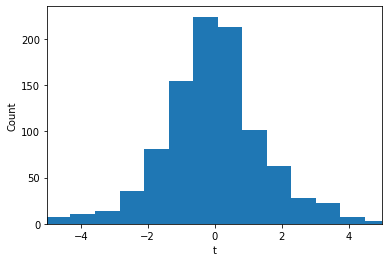

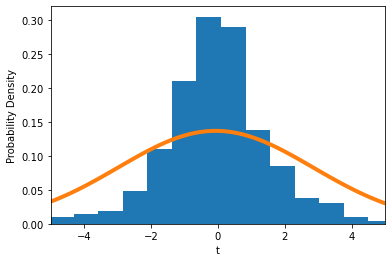

In [82]:
#random is useful here
import random

#parameters
iterations = 1000
sampsize = 3

#making dummy arrays... tuples? probably not lists?
sampt = []

#the for loop to iterate over the array
for m in np.arange(0,iterations,1):
    sample = random.sample(list(norm_data),sampsize)
    samplemean = np.mean(sample)
    print(sample)
    sampstdev = np.std(sample, ddof = 1)
    sampt.append(((samplemean-popmean)/sampstdev)*np.sqrt(sampsize))

#plotting
plt.subplots()
plt.hist(sampt, bins = 100)
plt.xlabel("t")
plt.xlim(-5,5)
plt.ylabel("Count")

plt.subplots()
plt.hist(sampt, density = True, bins = 100)
x = np.linspace((np.mean(sampt) - 3*np.std(sampt)), (np.mean(sampt) + 3*np.std(sampt)), 100)
plt.plot(x, stats.norm.pdf(x, np.mean(sampt), np.std(sampt)), linewidth = 4)
plt.xlabel("t")
plt.xlim(-5,5)
plt.ylabel("Probability Density")

Check that distribution works correctly.

Let's ensure that we can use our distribution to estimate a p value. You take 3 random measurements and get these numbers: 9.45, 10.3, and 11. Calculate and print your t value (call it t_val) and use your t distribution to estimate the odds of obtaining a t that is less than or equal to t_val. 

Check your answer by using stats.ttest_1samp to compare your p value with a p value calculated using the stats library.

In [83]:
s2 = [9.45, 10.3, 11]
s2mean = np.mean(s2)
s2stdev = np.std(s2, ddof = 1)
t_val = (s2mean-popmean)/s2stdev*np.sqrt(len(s2))
pvalue = (sum(norm_data >= t_val)/pop)
pvalue2 = stats.ttest_1samp(s2, popmean, alternative = "greater")
print('P value calculated manually is', pvalue, 'And p value thru the scipy lib is', pvalue2)

P value calculated manually is 1.0 And p value thru the scipy lib is Ttest_1sampResult(statistic=-3.9049920173544073, pvalue=0.9701199310591111)


# Problem 2: Does changing the number of samples collected (n) change the t distribution?

Step 3: Repeat step 2 but collect 6 samples from your normal distributions and the calculate t for each iteration. How do the density plots compare to the answer in Problem 1? Your answer must be clear.

Text(0, 0.5, 'Probability Density')

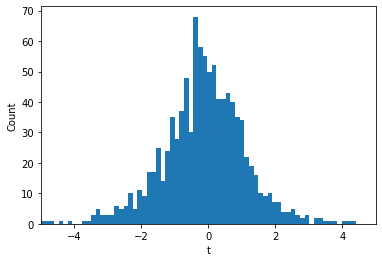

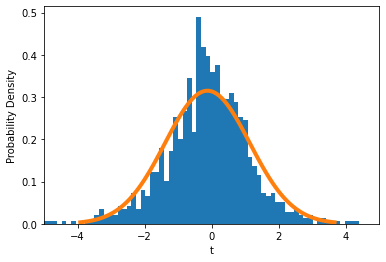

In [84]:
iterations = 1000
sampsize = 6

sampt = []
sampmean = []
sampstdev = []


for m in np.arange(0,iterations,1):
    sample = random.sample(list(norm_data),sampsize)
    sampmean.append(np.mean(sample))
    sampstdev.append(np.std(sample, ddof = 1))
    sampt.append((sampmean[m]-popmean)/sampstdev[m]*np.sqrt(sampsize))

#plotting
plt.subplots()
plt.hist(sampt, bins = 100)
plt.xlabel("t")
plt.xlim(-5,5)
plt.ylabel("Count")

plt.subplots()
plt.hist(sampt, density = True,bins = 100)
x = np.linspace((np.mean(sampt) - 3*np.std(sampt)), (np.mean(sampt) + 3*np.std(sampt)), 100)
plt.plot(x, stats.norm.pdf(x, np.mean(sampt), np.std(sampt)), linewidth = 4)
plt.xlabel("t")
plt.xlim(-5,5)
plt.ylabel("Probability Density")

There's distinctly more aggregation around the center; the standard deviation seems smaller. This likely approaches asymptotically to the population standard deviation.

# Problem 3: Does changing the mean and standard deviation of the population change the t distribution?

Step 4: We will skip step 1 this time and just directly pull samples from the population using random.norm($\mu$,$\sigma$,n=3). Write a for-loop in which you collect 3 samples from a normal distribution that has a mean of 6 and a standard deviation of 3 and calculate t. Iterate through this loop 1000 times and for each iteration, calculate and save the t statistic. Plot a histogram of the collected values and then plot a density plot of the collected values. Compare the t distribution to the t distribution estimated in Problem 1 and Comment.

(-5.0, 5.0)

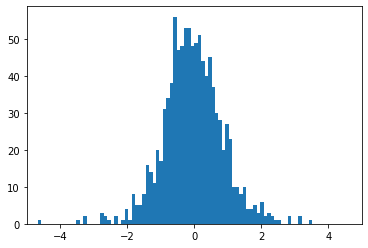

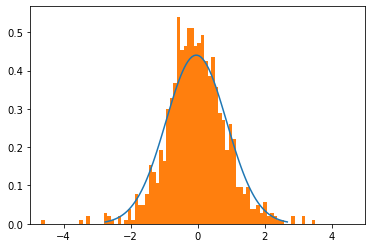

In [90]:
samp = []
t = []

for m in range (1, 1000):
    for k in range (1, 3):
        samp.append(np.random.normal(6,3,3))
    sampmean = np.mean(samp)
    sampstdev = np.std(samp, ddof = 1)
    t.append(((sampmean - 6)/(sampstdev))*np.sqrt(3))
    samp = []

tmean = np.mean(t)
tstd = np.std(t)
plt.subplots()
plt.hist(t, bins = 100)
plt.xlim(-5, 5)

plt.subplots()
x = np.linspace((tmean - 3*tstd), (tmean + 3*tstd), 100)
plt.plot(x, stats.norm.pdf(x, tmean, tstd))
plt.hist(t, density = True, bins = 100)
plt.xlim(-5, 5)

# Our takeways 

- t is used to determine the likelihood of obtaining a value of t with n measurements sampled from a normal distribution.
    - Interesting, the effect of n and the choice of $\mu$ and $\sigma$: a smaller $\mu$ and larger $\sigma$ produced a narrower peak. This is possibly an artifact of my coding, as statistically the $\mu$ and $\sigma$ should not change the t distribution. The number of samples changes the distribution, making it more narrow as the sample size increases.

    - One thing to note: the last block of code can make this point succinctly. By changing the mean and std deviation (copied below), I can demonstrate that these parameters do not change the distribution of t values.

- Note we have only covered the "single sample" t test here. A more commonly used t test is the two sample, which we'll cover next.

(-5.0, 5.0)

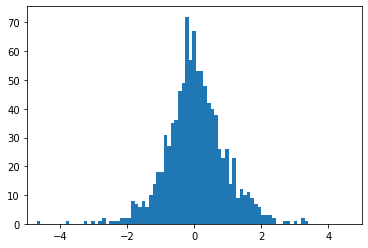

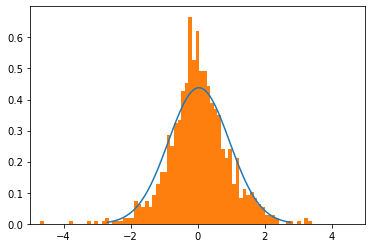

In [96]:
#demonstrating that mu and sigma do not change the t distribution, comparing to above charts

samp = []
t = []
mu = 10
sigma = 7

for m in range (1, 1000):
    for k in range (1, 3):
        samp.append(np.random.normal(mu,sigma,3))
    sampmean = np.mean(samp)
    sampstdev = np.std(samp, ddof = 1)
    t.append(((sampmean - mu)/(sampstdev))*np.sqrt(3))
    samp = []

tmean = np.mean(t)
tstd = np.std(t)
plt.subplots()
plt.hist(t, bins = 100)
plt.xlim(-5, 5)

plt.subplots()
x = np.linspace((tmean - 3*tstd), (tmean + 3*tstd), 100)
plt.plot(x, stats.norm.pdf(x, tmean, tstd))
plt.hist(t, density = True, bins = 100)
plt.xlim(-5, 5)